In [1]:
import scipy.io
import pandas as pd

# use the real file, not the "._" one
mat = scipy.io.loadmat('D:/PROJECT/Dataset/Dataset/Subj-1_Area-1_Act-1.mat')

# filter out internal metadata keys (starting with "_")
mat = {k: v for k, v in mat.items() if not k.startswith("__")}

# check keys
print(mat.keys())


dict_keys(['wifi_csi'])


In [2]:
import scipy.io
import pandas as pd
import numpy as np

# Load the real file
mat = scipy.io.loadmat('D:/PROJECT/Dataset/Dataset/Subj-1_Area-1_Act-1.mat')

# Extract wifi_csi
wifi_csi = mat['wifi_csi']   # shape (4332, 120, 3)

# Flatten: (4332, 120*3) = (4332, 360)
flat_data = wifi_csi.reshape(wifi_csi.shape[0], -1)

# Convert to DataFrame
df = pd.DataFrame(flat_data)

# Save as CSV
df.to_csv("D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-1.csv", index=False)


In [1]:
import os
import scipy.io
import pandas as pd

input_folder = "D:/PROJECT/Dataset/Dataset"
output_folder = "D:/PROJECT/Dataset/DatasetCSV"

os.makedirs(output_folder, exist_ok=True)

for file in os.listdir(input_folder):
    if file.endswith(".mat") and not file.startswith("._"):
        mat_path = os.path.join(input_folder, file)
        #csv_path = os.path.join(output_folder, file + ".csv")
        csv_path = os.path.join(output_folder, file.replace(".mat", ".csv"))


        # Load .mat file
        mat = scipy.io.loadmat(mat_path)
        mat = {k:v for k,v in mat.items() if not k.startswith("__")}

        # Flatten and convert to DataFrame
        for key, value in mat.items():
            df = pd.DataFrame(value.reshape(value.shape[0], -1))
            df.to_csv(csv_path, index=False)
            break   # usually only one useful variable


## Subj-1_Area-1_Act-1

Shape: (3589, 360)


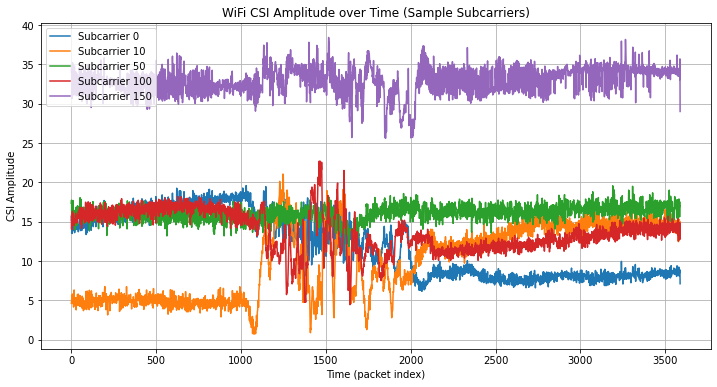

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# converted CSV file (example)
file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-1.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()


## Subj-1_Area-1_Act-2

Shape: (16000, 360)


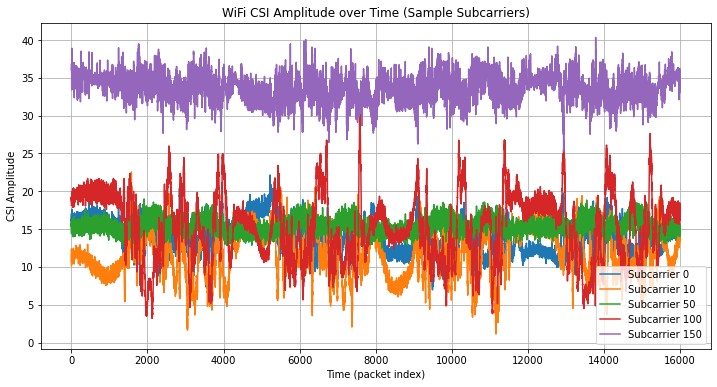

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your converted CSV file (example)
file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-2.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-1_Act-3

Shape: (17999, 360)


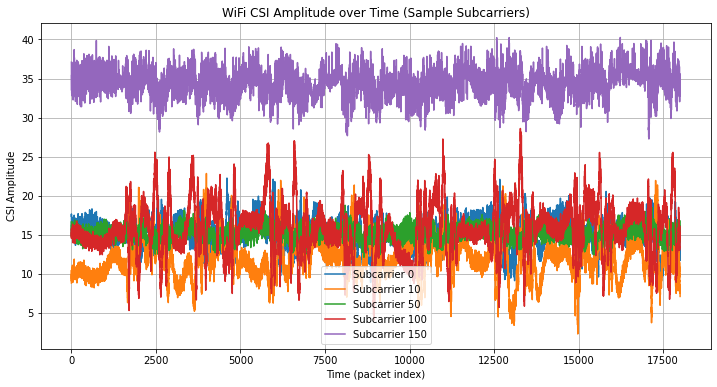

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your converted CSV file (example)
file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-3.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-1_Act-4

Shape: (17999, 360)


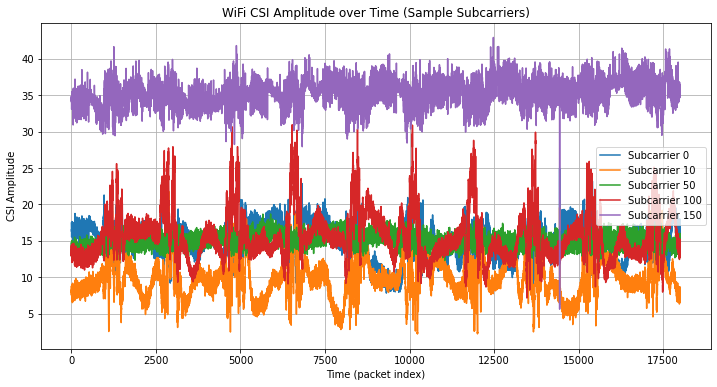

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your converted CSV file (example)
file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-4.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-1_Act-1, for each receiver

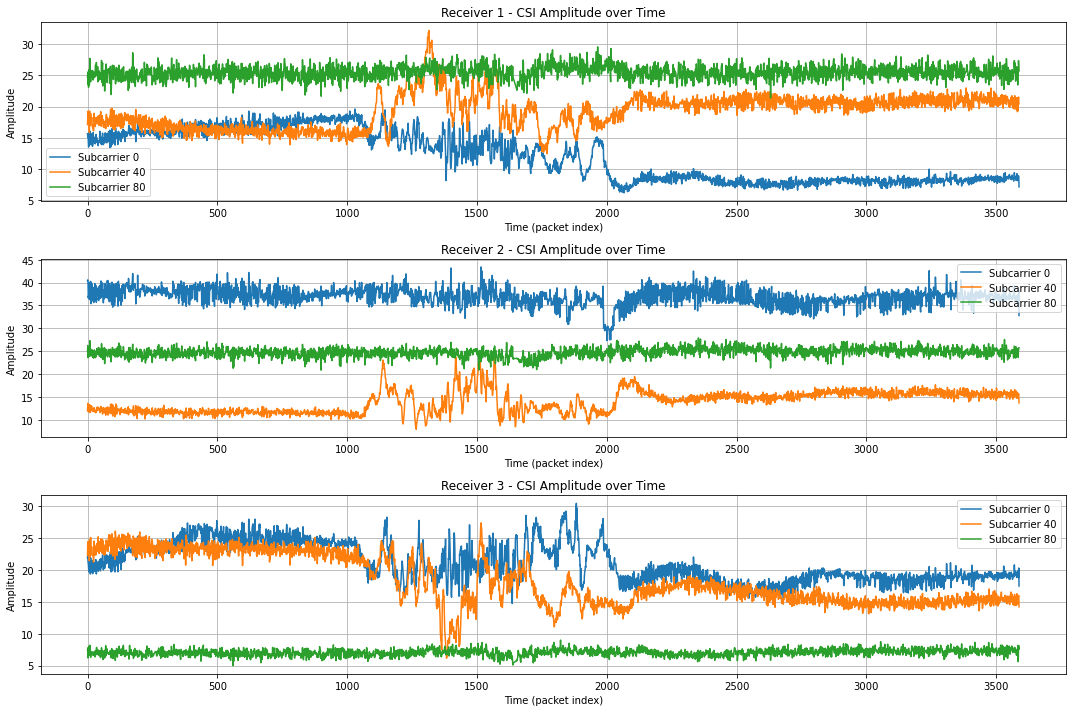

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-1.csv"
df = pd.read_csv(file_path)

# Define receiver groups (each has 120 subcarriers)
receiver_groups = {
    "Receiver 1": df.iloc[:, 0:120],
    "Receiver 2": df.iloc[:, 120:240],
    "Receiver 3": df.iloc[:, 240:360]
}

# Plot sample subcarriers from each receiver
plt.figure(figsize=(15, 10))

for i, (rx_name, rx_data) in enumerate(receiver_groups.items(), 1):
    plt.subplot(3, 1, i)
    # Pick every 40th subcarrier just for visibility
    for sub in range(0, 120, 40):
        plt.plot(rx_data.index, rx_data.iloc[:, sub], label=f'Subcarrier {sub}')
    plt.title(f'{rx_name} - CSI Amplitude over Time')
    plt.xlabel('Time (packet index)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


## Subj-1_Area-1_Act-5

Shape: (17999, 360)


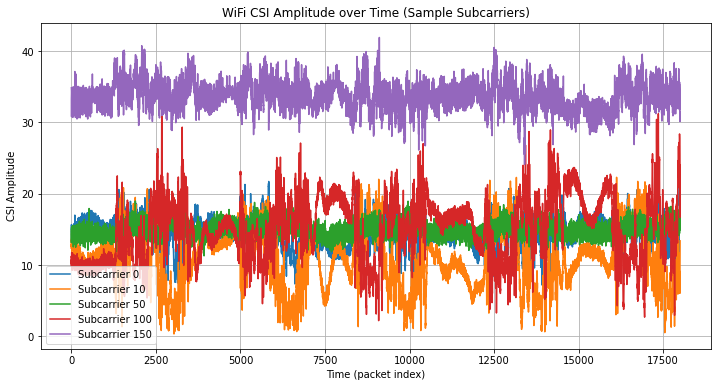

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-5.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-1_Act-6

Shape: (13201, 360)


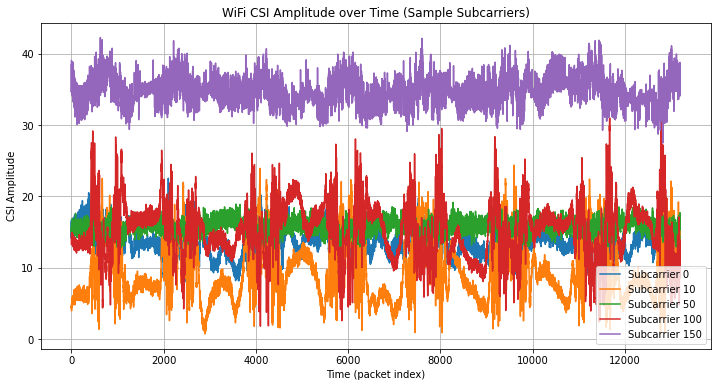

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-6.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-1_Act-7

Shape: (17999, 360)


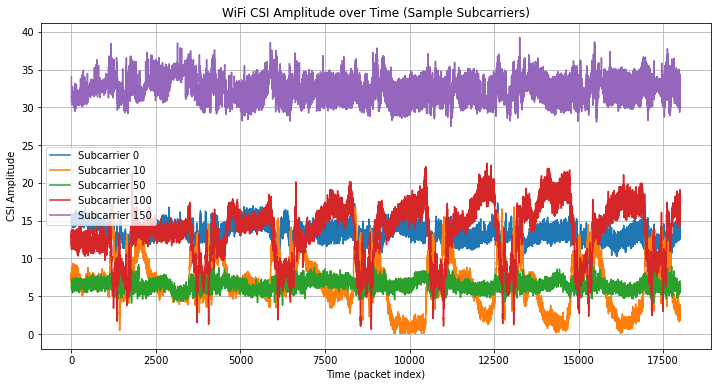

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-7.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-1_Act-8

Shape: (17999, 360)


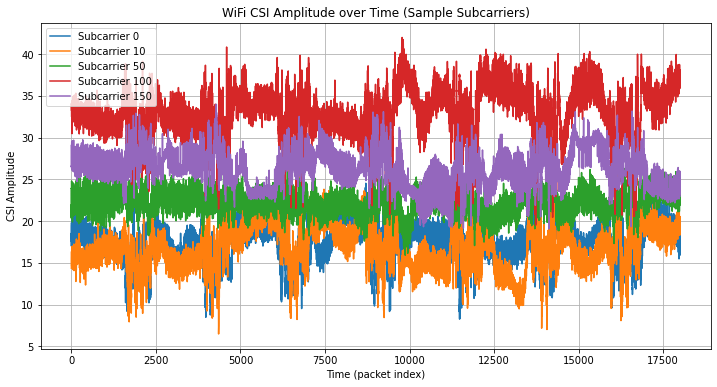

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-8.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-1_Act-9

Shape: (17999, 360)


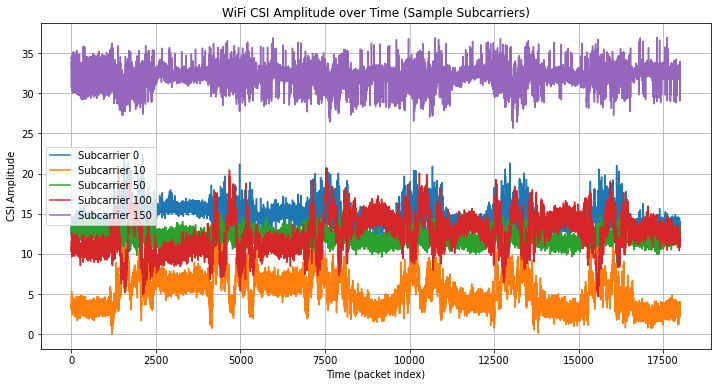

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-9.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-1_Act-10

Shape: (18000, 360)


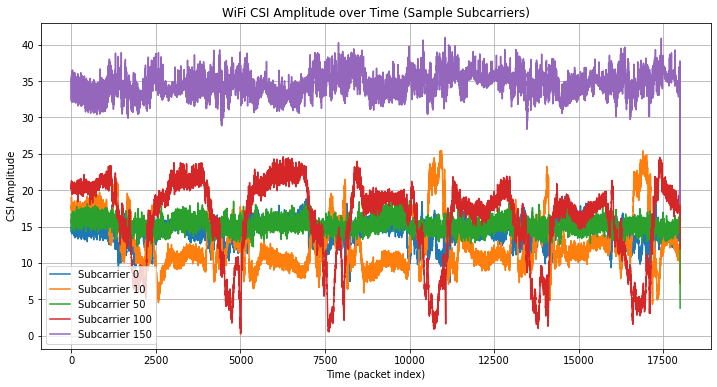

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-10.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-2_Act-1

Shape: (3915, 360)


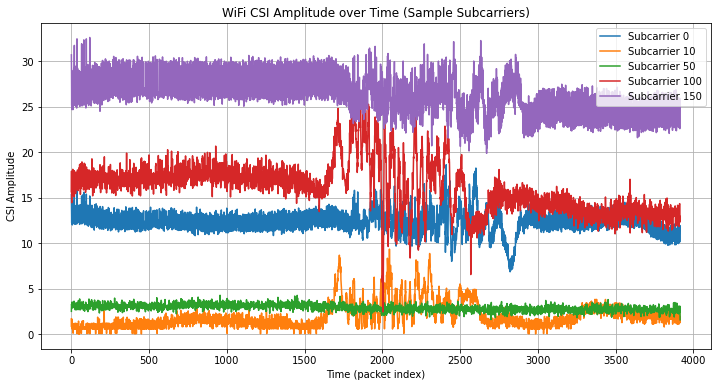

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-2_Act-1.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-2_Act-2

Shape: (17999, 360)


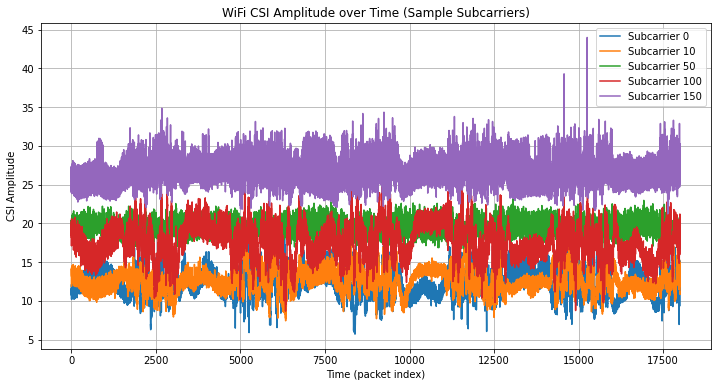

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-2_Act-2.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-2_Act-3

Shape: (17999, 360)


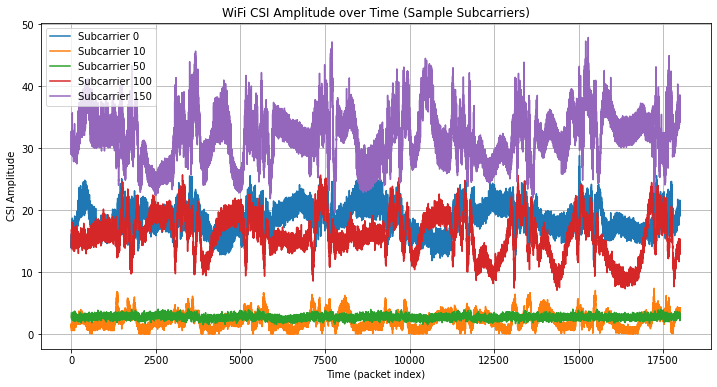

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-2_Act-3.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-2_Act-4

Shape: (17999, 360)


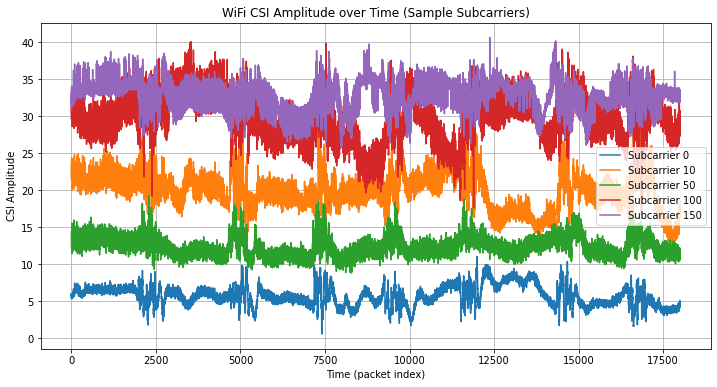

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-2_Act-4.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-2_Act-5

Shape: (17999, 360)


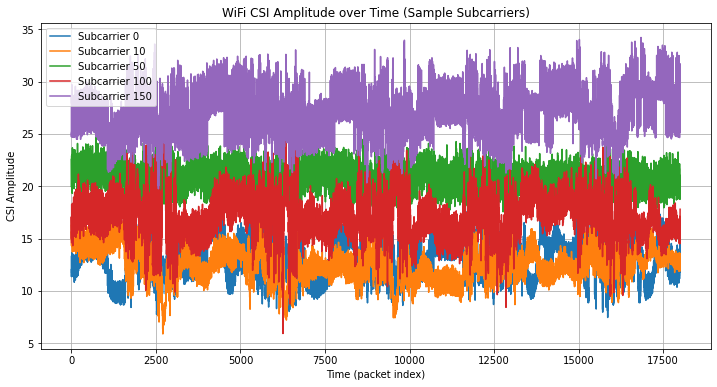

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-2_Act-5.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-2_Act-6

Shape: (17999, 360)


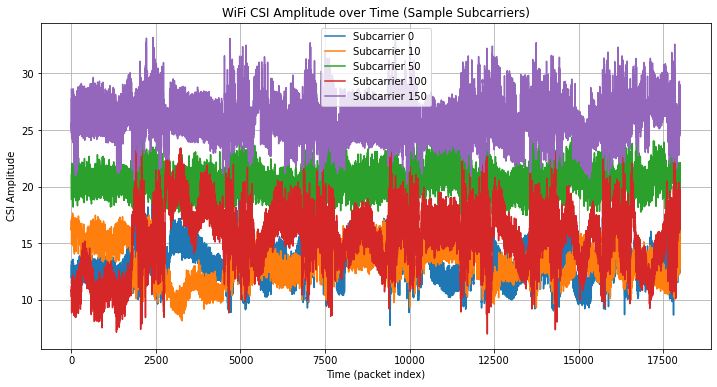

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-2_Act-6.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-2_Act-7

Shape: (17999, 360)


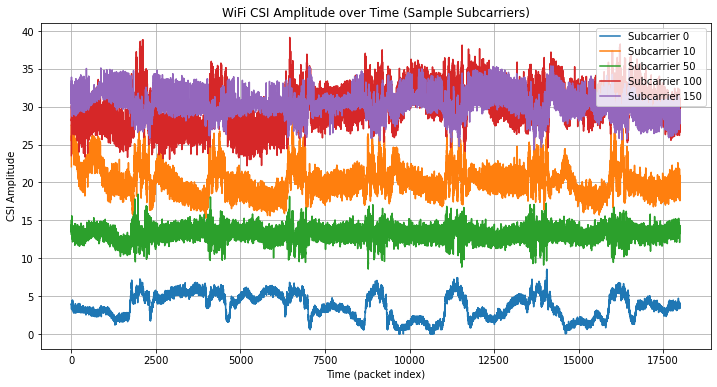

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-2_Act-7.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-2_Act-8

Shape: (17999, 360)


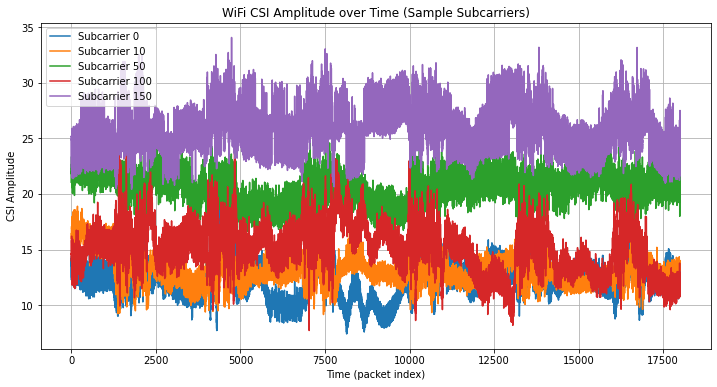

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-2_Act-8.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-2_Act-9

Shape: (17999, 360)


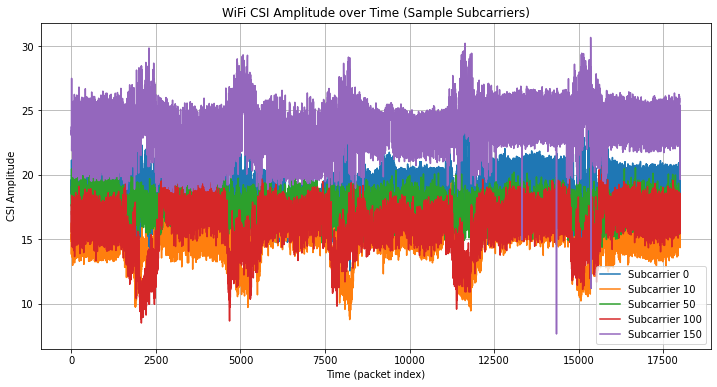

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-2_Act-9.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-2_Act-10

Shape: (17999, 360)


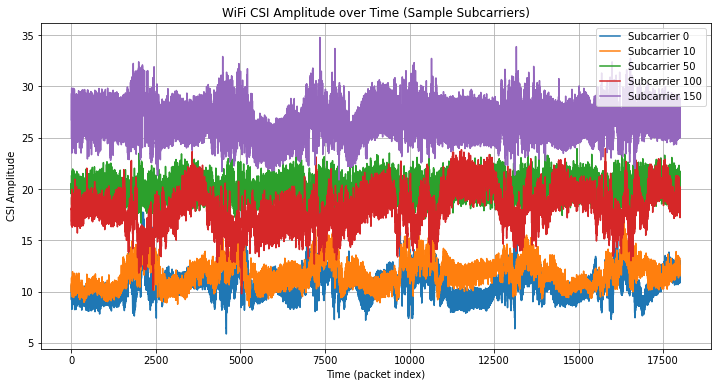

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-2_Act-10.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-3_Act-1

Shape: (3429, 360)


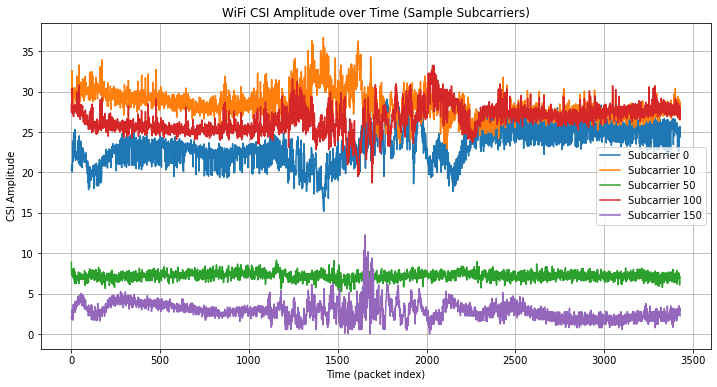

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-3_Act-1.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-3_Act-2

Shape: (17999, 360)


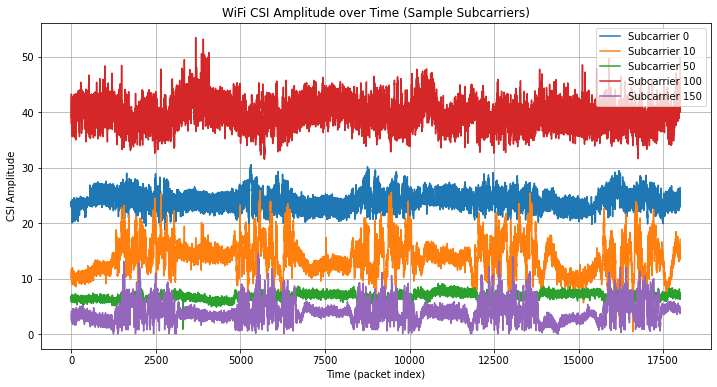

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-3_Act-2.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-3_Act-3

Shape: (11600, 360)


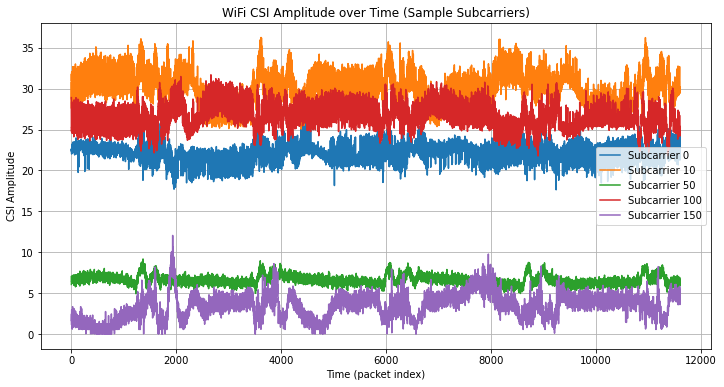

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-3_Act-3.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-3_Act-4

Shape: (17999, 360)


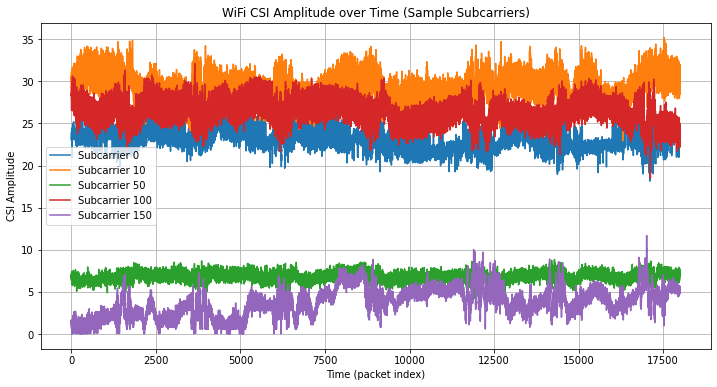

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-3_Act-4.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-3_Act-5

Shape: (17999, 360)


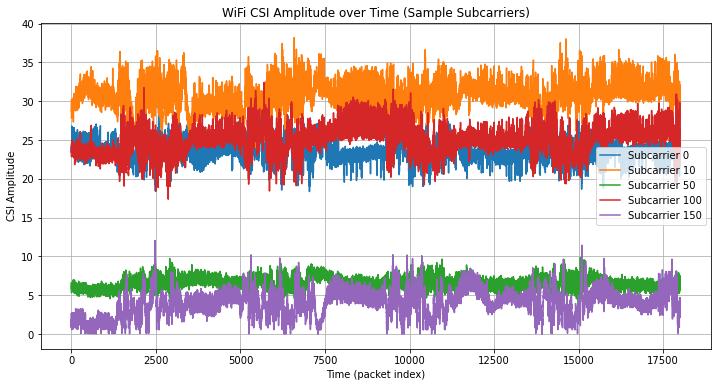

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-3_Act-5.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-3_Act-6

Shape: (17999, 360)


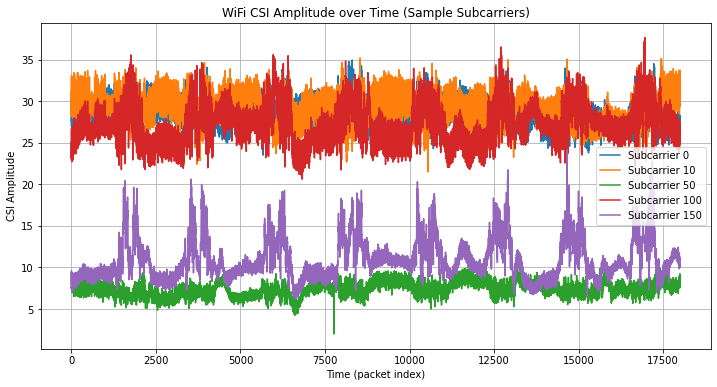

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-3_Act-6.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-3_Act-7

Shape: (17999, 360)


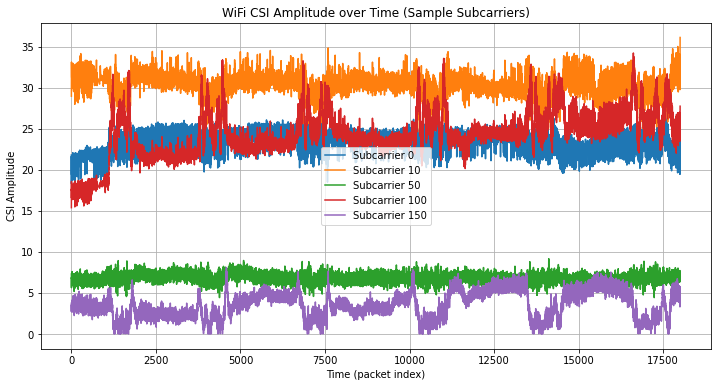

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-3_Act-7.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-3_Act-8

Shape: (17999, 360)


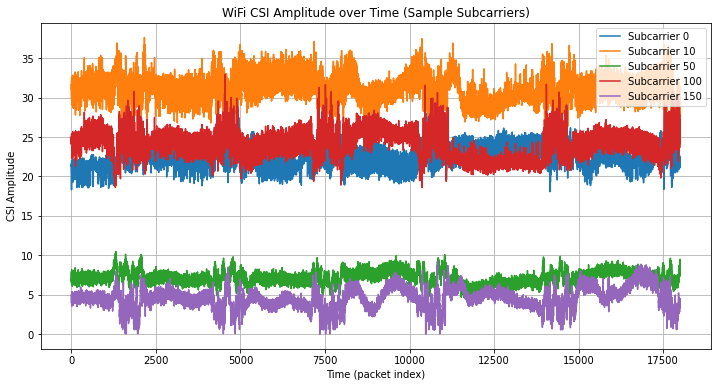

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-3_Act-8.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-3_Act-9

Shape: (17999, 360)


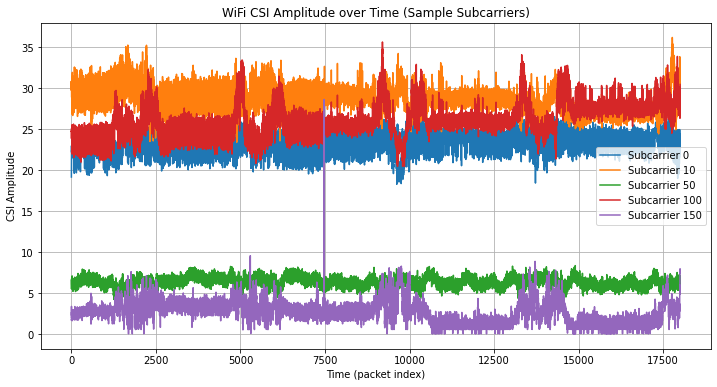

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-3_Act-9.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-1_Area-3_Act-10

Shape: (17999, 360)


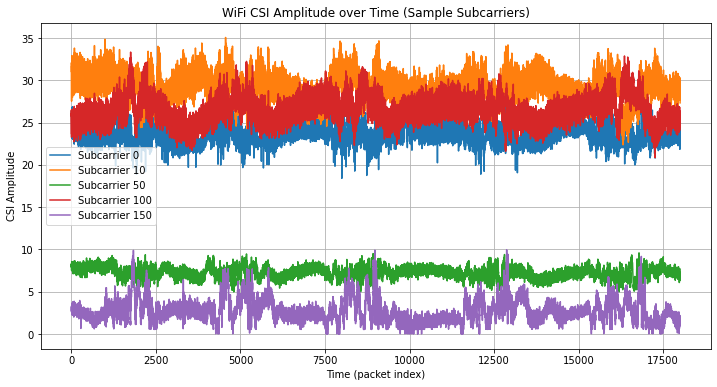

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-3_Act-10.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Subj-2_Area-1_Act-1

Shape: (5031, 360)


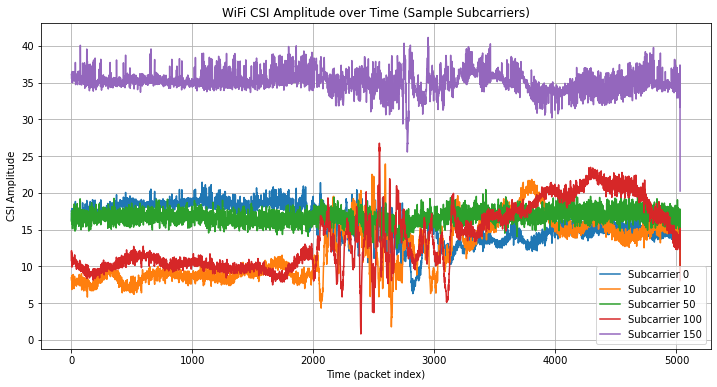

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-2_Area-1_Act-1.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import numpy as np
import pandas as pd
import glob

fixed_len = 3000
files = glob.glob('D:/PROJECT/Dataset/Dataset/*.csv')

processed = []

for f in files:
    df = pd.read_csv(f)
    data = df.values
    if data.shape[0] > fixed_len:
        data = data[:fixed_len, :]
    else:
        pad = np.zeros((fixed_len - data.shape[0], data.shape[1]))
        data = np.vstack((data, pad))
    processed.append(data)


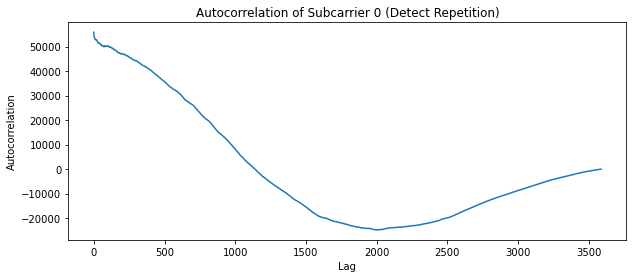

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load your CSV file
df = pd.read_csv("D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-1.csv")

# Step 2: Select one subcarrier column (for example, the first one)
signal = df.iloc[:, 0].values   # column 0 = Subcarrier 0

# Step 3: Compute autocorrelation
auto = np.correlate(signal - np.mean(signal), signal - np.mean(signal), mode='full')
auto = auto[auto.size // 2:]   # keep only positive lags

# Step 4: Plot the autocorrelation
plt.figure(figsize=(10,4))
plt.plot(auto)
plt.title("Autocorrelation of Subcarrier 0 (Detect Repetition)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

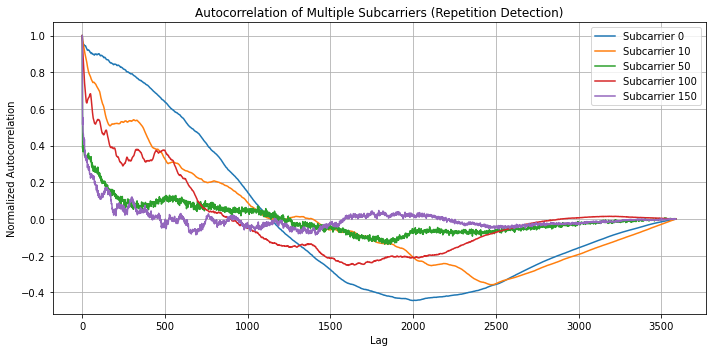

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load your CSV file
df = pd.read_csv("D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-1.csv")

# Step 2: Compute and plot autocorrelation for selected subcarriers
plt.figure(figsize=(10, 5))

for i in [0, 10, 50, 100, 150]:
    signal = df.iloc[:, i].values
    
    # Remove mean and compute autocorrelation
    auto = np.correlate(signal - np.mean(signal), signal - np.mean(signal), mode='full')
    auto = auto[auto.size // 2:]  # Keep only positive lags
    
    # Normalize for comparison
    auto = auto / np.max(auto)
    
    plt.plot(auto, label=f'Subcarrier {i}')

# Step 3: Plot formatting
plt.legend()
plt.title("Autocorrelation of Multiple Subcarriers (Repetition Detection)")
plt.xlabel("Lag")
plt.ylabel("Normalized Autocorrelation")
plt.grid(True)
plt.tight_layout()
plt.show()


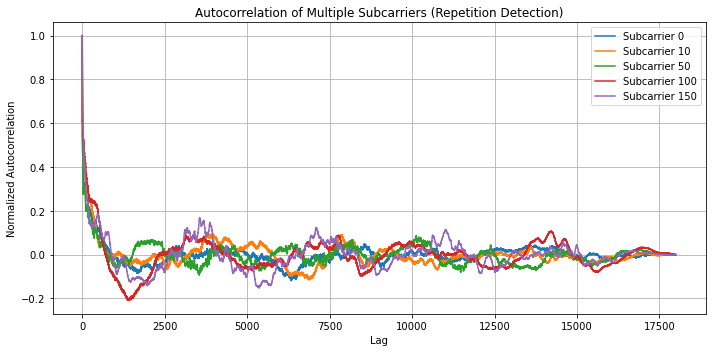

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load your CSV file
df = pd.read_csv("D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-3_Act-10.csv")

# Step 2: Compute and plot autocorrelation for selected subcarriers
plt.figure(figsize=(10, 5))

for i in [0, 10, 50, 100, 150]:
    signal = df.iloc[:, i].values
    
    # Remove mean and compute autocorrelation
    auto = np.correlate(signal - np.mean(signal), signal - np.mean(signal), mode='full')
    auto = auto[auto.size // 2:]  # Keep only positive lags
    
    # Normalize for comparison
    auto = auto / np.max(auto)
    
    plt.plot(auto, label=f'Subcarrier {i}')

# Step 3: Plot formatting
plt.legend()
plt.title("Autocorrelation of Multiple Subcarriers (Repetition Detection)")
plt.xlabel("Lag")
plt.ylabel("Normalized Autocorrelation")
plt.grid(True)
plt.tight_layout()
plt.show()


## whether the activity is repeating or not

In [ ]:
import pandas as pd
import numpy as np
import os

# ======== Configuration ========
base_path = "D:/PROJECT/Dataset/DatasetCSV/"
output_csv = os.path.join(base_path, "activity_repetition_report.csv")

# ======== Helper function ========
def detect_repetition(df, thresh=0.25, min_dist=100):
    # Compute energy envelope (RMS across subcarriers)
    envelope = np.sqrt(np.mean(df.values**2, axis=1))
    
    # Smooth envelope (moving average)
    window = 25
    kernel = np.ones(window) / window
    envelope_smooth = np.convolve(envelope, kernel, mode='same')

    # Compute autocorrelation
    env = envelope_smooth - envelope_smooth.mean()
    autocorr = np.correlate(env, env, mode='full')
    autocorr = autocorr[autocorr.size // 2:]  # Keep non-negative lags
    autocorr = autocorr / np.max(np.abs(autocorr))  # Normalize

    # Detect peaks in autocorrelation
    peaks = []
    N = len(autocorr)
    i = 1
    while i < N - 1:
        if autocorr[i] > autocorr[i-1] and autocorr[i] > autocorr[i+1] and autocorr[i] > thresh:
            if len(peaks) == 0 or (i - peaks[-1]) >= min_dist:
                peaks.append(i)
                i += min_dist
                continue
        i += 1

    # If peaks beyond lag 0 exist → repeated activity
    is_repeated = len(peaks) > 1
    return is_repeated, len(peaks) - 1  # number of repetitions detected


# ======== Main Loop for all 300 files ========
results = []

for subject in range(1, 11):      # 10 subjects
    for area in range(1, 4):      # 3 areas
        for activity in range(1, 11):  # 10 activities
            filename = f"Subj-{subject}_Area-{area}_Act-{activity}.csv"
            file_path = os.path.join(base_path, filename)

            if not os.path.exists(file_path):
                print(f"⚠️ Missing file: {filename}")
                continue

            try:
                df = pd.read_csv(file_path)
                repeated, peak_count = detect_repetition(df)
                status = "Repeated" if repeated else "Not Repeated"

                results.append({
                    "Subject": subject,
                    "Area": area,
                    "Activity": activity,
                    "Status": status,
                    "Peak_Count": peak_count
                })

                print(f"{filename} → {status}")

            except Exception as e:
                print(f"❌ Error reading {filename}: {e}")


# ======== Save results ========
report_df = pd.DataFrame(results)
report_df.to_csv(output_csv, index=False)

print("\n✅ Analysis complete!")
print("📄 Results saved to:", output_csv)


Subj-1_Area-1_Act-1.csv → Repeated
Subj-1_Area-1_Act-2.csv → Not Repeated
Subj-1_Area-1_Act-3.csv → Not Repeated
Subj-1_Area-1_Act-4.csv → Not Repeated
Subj-1_Area-1_Act-5.csv → Not Repeated
Subj-1_Area-1_Act-6.csv → Not Repeated
Subj-1_Area-1_Act-7.csv → Not Repeated
Subj-1_Area-1_Act-8.csv → Not Repeated
Subj-1_Area-1_Act-9.csv → Repeated
Subj-1_Area-1_Act-10.csv → Not Repeated
Subj-1_Area-2_Act-1.csv → Not Repeated
Subj-1_Area-2_Act-2.csv → Not Repeated
Subj-1_Area-2_Act-3.csv → Not Repeated
Subj-1_Area-2_Act-4.csv → Not Repeated
Subj-1_Area-2_Act-5.csv → Not Repeated
Subj-1_Area-2_Act-6.csv → Not Repeated
Subj-1_Area-2_Act-7.csv → Repeated
Subj-1_Area-2_Act-8.csv → Not Repeated
Subj-1_Area-2_Act-9.csv → Repeated
Subj-1_Area-2_Act-10.csv → Repeated
Subj-1_Area-3_Act-1.csv → Not Repeated
Subj-1_Area-3_Act-2.csv → Repeated
Subj-1_Area-3_Act-3.csv → Not Repeated
Subj-1_Area-3_Act-4.csv → Not Repeated
Subj-1_Area-3_Act-5.csv → Not Repeated
Subj-1_Area-3_Act-6.csv → Not Repeated
Subj-1_A

## automatically generate all 30 folders (one for each subject–area pair) and plot all 300 graphs at once

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Base path of your dataset folder
base_path = "D:/PROJECT/Dataset/DatasetCSV/"

# Subcarriers to visualize
sample_subcarriers = [0, 10, 50, 100, 150]

# Loop through all subjects and areas
for subject in range(1, 11):        # Subjects 1–10
    for area in range(1, 4):        # Areas 1–3

        # Folder to save plots for each subject & area
        output_folder = os.path.join(base_path, f"Plots_Subj{subject}_Area{area}")
        os.makedirs(output_folder, exist_ok=True)

        # Loop through all activities
        for activity in range(1, 11):  # Activities 1–10
            filename = f"Subj-{subject}_Area-{area}_Act-{activity}.csv"
            file_path = os.path.join(base_path, filename)

            if not os.path.exists(file_path):
                print(f" Missing file: {filename}")
                continue

            df = pd.read_csv(file_path)

            # Plot CSI amplitude for selected subcarriers
            plt.figure(figsize=(10, 5))
            for sub in sample_subcarriers:
                if sub < df.shape[1]:
                    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

            plt.title(f'Subject {subject} | Area {area} | Activity {activity}')
            plt.xlabel('Time (packet index)')
            plt.ylabel('CSI Amplitude')
            plt.legend()
            plt.grid(True)

            # Save the plot
            save_path = os.path.join(output_folder, f"Act-{activity}.png")
            plt.savefig(save_path)
            plt.close()

        print(f" All 10 activity graphs saved for Subject {subject}, Area {area}")

print("\n Done! All 300 graphs generated successfully.")


 All 10 activity graphs saved for Subject 1, Area 1
 All 10 activity graphs saved for Subject 1, Area 2
 All 10 activity graphs saved for Subject 1, Area 3
 All 10 activity graphs saved for Subject 2, Area 1
 All 10 activity graphs saved for Subject 2, Area 2
 All 10 activity graphs saved for Subject 2, Area 3
 All 10 activity graphs saved for Subject 3, Area 1
 All 10 activity graphs saved for Subject 3, Area 2
 All 10 activity graphs saved for Subject 3, Area 3
 All 10 activity graphs saved for Subject 4, Area 1
 All 10 activity graphs saved for Subject 4, Area 2
 All 10 activity graphs saved for Subject 4, Area 3
 All 10 activity graphs saved for Subject 5, Area 1
 All 10 activity graphs saved for Subject 5, Area 2
 All 10 activity graphs saved for Subject 5, Area 3
 All 10 activity graphs saved for Subject 6, Area 1
 All 10 activity graphs saved for Subject 6, Area 2
 All 10 activity graphs saved for Subject 6, Area 3
 All 10 activity graphs saved for Subject 7, Area 1
 All 10 acti

C:\Users\Shilpi Rani\AppData\Local\Temp\ipykernel_4724\1383094227.py:44: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(save_path)


 All 10 activity graphs saved for Subject 9, Area 1
 All 10 activity graphs saved for Subject 9, Area 2
 All 10 activity graphs saved for Subject 9, Area 3
 All 10 activity graphs saved for Subject 10, Area 1
 All 10 activity graphs saved for Subject 10, Area 2
 All 10 activity graphs saved for Subject 10, Area 3

 Done! All 300 graphs generated successfully.


## Plot All Activity Graphs Together

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Base path of your dataset folder
base_path = "D:/PROJECT/Dataset/DatasetCSV/"

# Subcarriers to visualize
sample_subcarriers = [0, 10, 50, 100, 150]

# Folder to save combined plots for each activity
output_folder = os.path.join(base_path, "ActivityWise_Plots")
os.makedirs(output_folder, exist_ok=True)

# Loop through all 10 activities
for activity in range(1, 11):  # Activities 1–10
    plt.figure(figsize=(12, 6))
    plotted = False  # Track if at least one file was plotted

    # Loop through all subjects and areas for the same activity
    for subject in range(1, 11):  # Subjects 1–10
        for area in range(1, 4):  # Areas 1–3
            filename = f"Subj-{subject}_Area-{area}_Act-{activity}.csv"
            file_path = os.path.join(base_path, filename)

            if not os.path.exists(file_path):
                print(f" Missing file: {filename}")
                continue

            df = pd.read_csv(file_path)

            # Plot CSI amplitude for one selected subcarrier (for clarity)
            # You can change the subcarrier index here if you want
            sub = sample_subcarriers[0]  # e.g., subcarrier 0
            if sub < df.shape[1]:
                plt.plot(df.index, df.iloc[:, sub],
                         label=f'S{subject}-{area}',
                         alpha=0.6)
                plotted = True

    if plotted:
        plt.title(f"Activity {activity} — CSI Amplitude over Time (All Subjects & Areas)")
        plt.xlabel("Time (packet index)")
        plt.ylabel("CSI Amplitude")
        plt.legend(title="Subj-Area", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)

        # Save the combined plot
        save_path = os.path.join(output_folder, f"Activity_{activity}.png")
        plt.tight_layout()
        plt.savefig(save_path)
        plt.close()

        print(f" Saved plot for Activity {activity} ({save_path})")
    else:
        print(f" No data found for Activity {activity}")

print("\n Done! All 10 activity-level comparison graphs saved.")


 Saved plot for Activity 1 (D:/PROJECT/Dataset/DatasetCSV/ActivityWise_Plots\Activity_1.png)
 Saved plot for Activity 2 (D:/PROJECT/Dataset/DatasetCSV/ActivityWise_Plots\Activity_2.png)
 Saved plot for Activity 3 (D:/PROJECT/Dataset/DatasetCSV/ActivityWise_Plots\Activity_3.png)
 Saved plot for Activity 4 (D:/PROJECT/Dataset/DatasetCSV/ActivityWise_Plots\Activity_4.png)
 Saved plot for Activity 5 (D:/PROJECT/Dataset/DatasetCSV/ActivityWise_Plots\Activity_5.png)
 Saved plot for Activity 6 (D:/PROJECT/Dataset/DatasetCSV/ActivityWise_Plots\Activity_6.png)
 Saved plot for Activity 7 (D:/PROJECT/Dataset/DatasetCSV/ActivityWise_Plots\Activity_7.png)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Shape: (5031, 360)


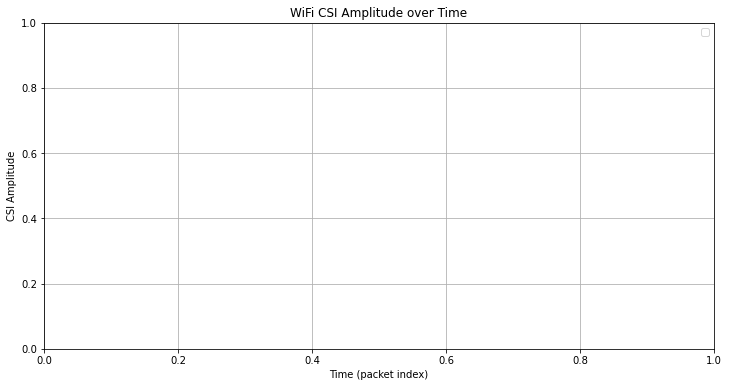

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-2_Area-1_Act-1.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
#sample_subcarriers = [0, 10, 50, 100, 150]

plt.figure(figsize=(12, 6))
#for sub in sample_subcarriers:
    #plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

Shape: (17999, 360)


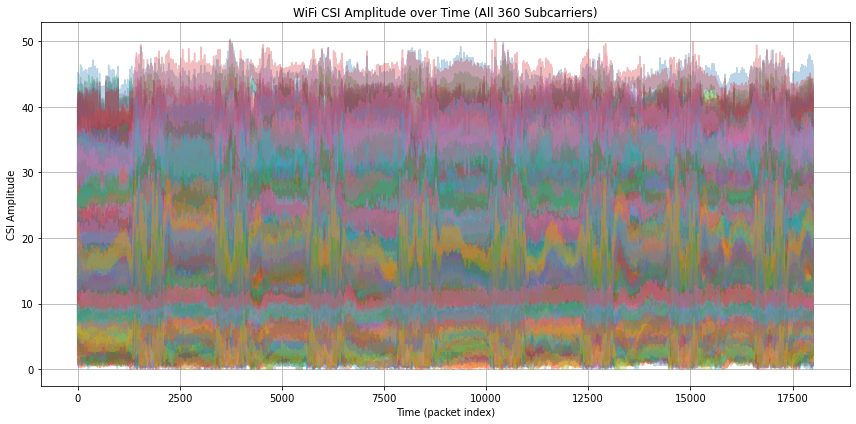

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-3_Act-6.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Plot all subcarriers
plt.figure(figsize=(12, 6))
for sub in range(df.shape[1]):  # Loop through all 360 subcarriers
    plt.plot(df.index, df.iloc[:, sub], alpha=0.3)  # alpha=0.3 for transparency

plt.title('WiFi CSI Amplitude over Time (All 360 Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()


## variance of each subcarrier

In [1]:
import pandas as pd
import numpy as np

# ====== Load your CSV file ======
file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-1.csv"
df = pd.read_csv(file_path)

# ====== Compute variance for each subcarrier (column) ======
variances = df.var(axis=0)

# ====== Create a summary table ======
variance_df = pd.DataFrame({
    'Subcarrier': df.columns,
    'Variance': variances.values
})

# ====== Sort by variance (highest first) ======
variance_df = variance_df.sort_values(by='Variance', ascending=False)

# ====== Display top subcarriers with highest variance ======
print("Top 10 subcarriers with highest variance:")
print(variance_df.head(10))

# ====== Save full variance report ======
variance_df.to_csv("D:/PROJECT/Dataset/DatasetCSV/subcarrier_variance_report.csv", index=False)
print("\n Variance report saved as 'subcarrier_variance_report.csv'")


Top 10 subcarriers with highest variance:
    Subcarrier   Variance
13          13  41.944571
16          16  28.521515
205        205  22.337969
31          31  22.289873
208        208  21.798572
10          10  20.228524
192        192  19.831206
226        226  17.778396
253        253  17.551315
82          82  17.376078

 Variance report saved as 'subcarrier_variance_report.csv'


Shape: (3589, 360)


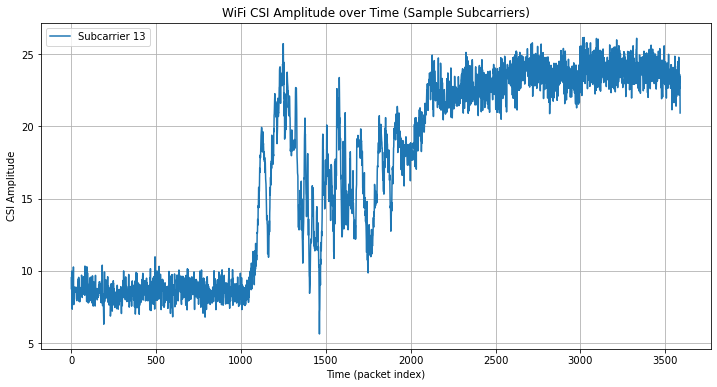

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-1.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [13]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## for subj-1_Area-1_Act-7

In [1]:
import pandas as pd
import numpy as np

# ====== Load your CSV file ======
file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-7.csv"
df = pd.read_csv(file_path)

# ====== Compute variance for each subcarrier (column) ======
variances = df.var(axis=0)

# ====== Create a summary table ======
variance_df = pd.DataFrame({
    'Subcarrier': df.columns,
    'Variance': variances.values
})

# ====== Sort by variance (highest first) ======
variance_df = variance_df.sort_values(by='Variance', ascending=False)

# ====== Display top subcarriers with highest variance ======
print("Top 10 subcarriers with highest variance:")
print(variance_df.head(10))

# ====== Save full variance report ======
variance_df.to_csv("D:/PROJECT/Dataset/DatasetCSV/subcarrier_variance_report.csv", index=False)
print("\n Variance report saved as 'subcarrier_variance_report.csv'")


Top 10 subcarriers with highest variance:
    Subcarrier   Variance
79          79  31.158689
244        244  29.516476
250        250  29.302286
76          76  29.288399
241        241  26.834947
247        247  26.643486
73          73  24.552088
52          52  24.476197
49          49  23.683323
25          25  22.997592

 Variance report saved as 'subcarrier_variance_report.csv'


Shape: (17999, 360)


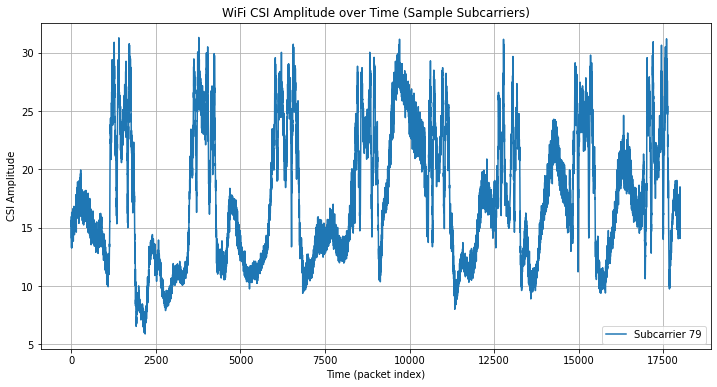

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-7.csv"
df = pd.read_csv(file_path)

# Check shape (rows = time samples, columns = subcarriers)
print("Shape:", df.shape)

# Choose a few subcarriers to visualize (for example: 0, 10, 50, 100, 150)
sample_subcarriers = [79]

plt.figure(figsize=(12, 6))
for sub in sample_subcarriers:
    plt.plot(df.index, df.iloc[:, sub], label=f'Subcarrier {sub}')

plt.title('WiFi CSI Amplitude over Time (Sample Subcarriers)')
plt.xlabel('Time (packet index)')
plt.ylabel('CSI Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Auto Detect Highest Variance Subcarrier + Trials for Subj-1_Area-1_Act-7

 Trials will be saved in: D:/PROJECT/Dataset/Trials/
 Total subcarriers in file: 360
 Highest variance subcarrier: 79  (Subcarrier number: 80)

Detected 15 high-variance trials for 79:
 Saved D:/PROJECT/Dataset/Trials/trial_79_1321_1450.csv (range 1321-1450)
 Saved D:/PROJECT/Dataset/Trials/trial_79_1662_1775.csv (range 1662-1775)
 Saved D:/PROJECT/Dataset/Trials/trial_79_3691_3805.csv (range 3691-3805)
 Saved D:/PROJECT/Dataset/Trials/trial_79_6504_6616.csv (range 6504-6616)
 Saved D:/PROJECT/Dataset/Trials/trial_79_8523_8642.csv (range 8523-8642)
 Saved D:/PROJECT/Dataset/Trials/trial_79_8872_9052.csv (range 8872-9052)
 Saved D:/PROJECT/Dataset/Trials/trial_79_10671_10787.csv (range 10671-10787)
 Saved D:/PROJECT/Dataset/Trials/trial_79_11012_11130.csv (range 11012-11130)
 Saved D:/PROJECT/Dataset/Trials/trial_79_12765_12886.csv (range 12765-12886)
 Saved D:/PROJECT/Dataset/Trials/trial_79_13087_13200.csv (range 13087-13200)
 Saved D:/PROJECT/Dataset/Trials/trial_79_14972_15087.csv (

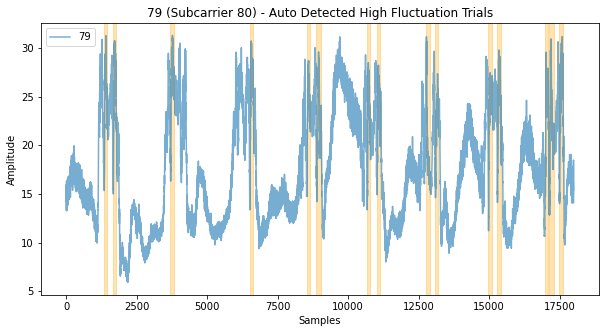

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ====== Step 1: Load your CSV file ======
file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-7.csv"   
df = pd.read_csv(file_path)

# ====== Step 2: Folder to save trials ======
save_path = "D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-7/"         
os.makedirs(save_path, exist_ok=True)
print(f" Trials will be saved in: {save_path}")

# ====== Step 3: Find subcarrier with highest variance ======
variances = df.var(axis=0)
top_sub = variances.idxmax()
top_sub_index = list(df.columns).index(top_sub) + 1   # +1 for human-friendly numbering

print(f" Total subcarriers in file: {len(df.columns)}")
print(f" Highest variance subcarrier: {top_sub}  (Subcarrier number: {top_sub_index})")

# ====== Step 4: Compute rolling standard deviation ======
signal = df[top_sub].values
window_size = 100  # Adjust depending on signal smoothness
rolling_std = pd.Series(signal).rolling(window=window_size).std()

# ====== Step 5: Detect high-fluctuation regions ======
threshold = rolling_std.mean() + rolling_std.std()
high_var = rolling_std > threshold

segments = []
in_segment = False
start = None

for i, val in enumerate(high_var):
    if val and not in_segment:
        start = i
        in_segment = True
    elif not val and in_segment:
        end = i
        if end - start > window_size:  # ignore tiny spikes
            segments.append((start, end))
        in_segment = False

# Handle case where the signal ends inside a segment
if in_segment:
    segments.append((start, len(signal)))

# ====== Step 6: Save each detected region as a trial ======
print(f"\nDetected {len(segments)} high-variance trials for {top_sub}:")

for idx, (start_idx, end_idx) in enumerate(segments, start=1):
    trial = df.loc[start_idx:end_idx, [top_sub]]
    filename = os.path.join(save_path, f"trial_{top_sub}_{start_idx}_{end_idx}.csv")
    trial.to_csv(filename, index=False)
    print(f" Saved {filename} (range {start_idx}-{end_idx})")

# ====== Step 7: Plot signal with highlighted trial regions ======
plt.figure(figsize=(10, 5))
plt.plot(signal, label=f'{top_sub}', alpha=0.6)
for (start, end) in segments:
    plt.axvspan(start, end, color='orange', alpha=0.3)
plt.title(f"{top_sub} (Subcarrier {top_sub_index}) - Auto Detected High Fluctuation Trials")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


Columns in this file: ['79']


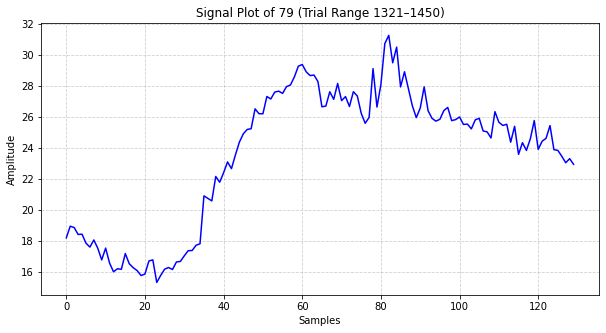

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# ====== Load your trial file ======
file_path = "D:/PROJECT/Dataset/Trials/trial_79_1321_1450.csv"  
df = pd.read_csv(file_path)

# ====== Check what’s inside ======
print("Columns in this file:", df.columns.tolist())

# ====== Plot the signal ======
plt.figure(figsize=(10,5))
plt.plot(df[df.columns[0]], color='blue', linewidth=1.5)
plt.title(f"Signal Plot of {df.columns[0]} (Trial Range 1321–1450)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## for Subj-1_Area-1_Act-1

 Trials will be saved in: D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1/
 Total subcarriers in file: 360
 Highest variance subcarrier: 13  (Subcarrier number: 14)

Detected 3 high-variance trials for 13:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1/trial_13_1110_1274.csv (range 1110-1274)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1/trial_13_1336_1681.csv (range 1336-1681)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1/trial_13_1736_1874.csv (range 1736-1874)


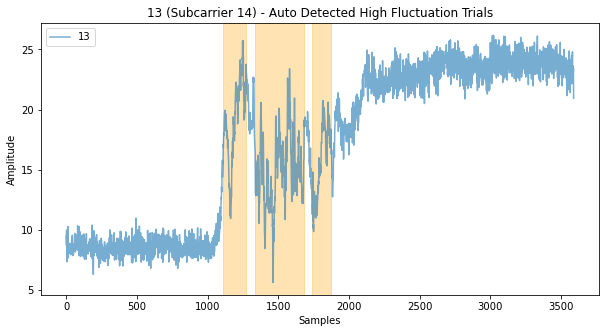

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ====== Step 1: Load your CSV file ======
file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-1.csv"   
df = pd.read_csv(file_path)

# ====== Step 2: Folder to save trials ======
save_path = "D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1/"         
os.makedirs(save_path, exist_ok=True)
print(f" Trials will be saved in: {save_path}")

# ====== Step 3: Find subcarrier with highest variance ======
variances = df.var(axis=0)
top_sub = variances.idxmax()
top_sub_index = list(df.columns).index(top_sub) + 1   # +1 for human-friendly numbering

print(f" Total subcarriers in file: {len(df.columns)}")
print(f" Highest variance subcarrier: {top_sub}  (Subcarrier number: {top_sub_index})")

# ====== Step 4: Compute rolling standard deviation ======
signal = df[top_sub].values
window_size = 100  # Adjust depending on signal smoothness
rolling_std = pd.Series(signal).rolling(window=window_size).std()

# ====== Step 5: Detect high-fluctuation regions ======
threshold = rolling_std.mean() + rolling_std.std()
high_var = rolling_std > threshold

segments = []
in_segment = False
start = None

for i, val in enumerate(high_var):
    if val and not in_segment:
        start = i
        in_segment = True
    elif not val and in_segment:
        end = i
        if end - start > window_size:  # ignore tiny spikes
            segments.append((start, end))
        in_segment = False

# Handle case where the signal ends inside a segment
if in_segment:
    segments.append((start, len(signal)))

# ====== Step 6: Save each detected region as a trial ======
print(f"\nDetected {len(segments)} high-variance trials for {top_sub}:")

for idx, (start_idx, end_idx) in enumerate(segments, start=1):
    trial = df.loc[start_idx:end_idx, [top_sub]]
    filename = os.path.join(save_path, f"trial_{top_sub}_{start_idx}_{end_idx}.csv")
    trial.to_csv(filename, index=False)
    print(f" Saved {filename} (range {start_idx}-{end_idx})")

# ====== Step 7: Plot signal with highlighted trial regions ======
plt.figure(figsize=(10, 5))
plt.plot(signal, label=f'{top_sub}', alpha=0.6)
for (start, end) in segments:
    plt.axvspan(start, end, color='orange', alpha=0.3)
plt.title(f"{top_sub} (Subcarrier {top_sub_index}) - Auto Detected High Fluctuation Trials")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


## for Subj-1_Area-1_Act-2

 Trials will be saved in: D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2/
 Total subcarriers in file: 360
 Highest variance subcarrier: 343  (Subcarrier number: 344)

Detected 4 high-variance trials for 343:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2/trial_343_2854_3023.csv (range 2854-3023)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2/trial_343_7517_7694.csv (range 7517-7694)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2/trial_343_11058_11168.csv (range 11058-11168)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2/trial_343_15200_15331.csv (range 15200-15331)


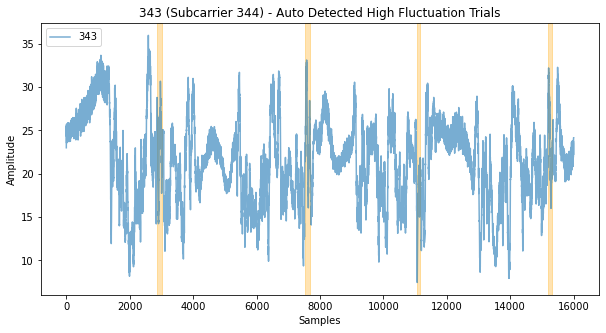

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ====== Step 1: Load your CSV file ======
file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-2.csv"   
df = pd.read_csv(file_path)

# ====== Step 2: Folder to save trials ======
save_path = "D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2/"         
os.makedirs(save_path, exist_ok=True)
print(f" Trials will be saved in: {save_path}")

# ====== Step 3: Find subcarrier with highest variance ======
variances = df.var(axis=0)
top_sub = variances.idxmax()
top_sub_index = list(df.columns).index(top_sub) + 1   # +1 for human-friendly numbering

print(f" Total subcarriers in file: {len(df.columns)}")
print(f" Highest variance subcarrier: {top_sub}  (Subcarrier number: {top_sub_index})")

# ====== Step 4: Compute rolling standard deviation ======
signal = df[top_sub].values
window_size = 100  # Adjust depending on signal smoothness
rolling_std = pd.Series(signal).rolling(window=window_size).std()

# ====== Step 5: Detect high-fluctuation regions ======
threshold = rolling_std.mean() + rolling_std.std()
high_var = rolling_std > threshold

segments = []
in_segment = False
start = None

for i, val in enumerate(high_var):
    if val and not in_segment:
        start = i
        in_segment = True
    elif not val and in_segment:
        end = i
        if end - start > window_size:  # ignore tiny spikes
            segments.append((start, end))
        in_segment = False

# Handle case where the signal ends inside a segment
if in_segment:
    segments.append((start, len(signal)))

# ====== Step 6: Save each detected region as a trial ======
print(f"\nDetected {len(segments)} high-variance trials for {top_sub}:")

for idx, (start_idx, end_idx) in enumerate(segments, start=1):
    trial = df.loc[start_idx:end_idx, [top_sub]]
    filename = os.path.join(save_path, f"trial_{top_sub}_{start_idx}_{end_idx}.csv")
    trial.to_csv(filename, index=False)
    print(f" Saved {filename} (range {start_idx}-{end_idx})")

# ====== Step 7: Plot signal with highlighted trial regions ======
plt.figure(figsize=(10, 5))
plt.plot(signal, label=f'{top_sub}', alpha=0.6)
for (start, end) in segments:
    plt.axvspan(start, end, color='orange', alpha=0.3)
plt.title(f"{top_sub} (Subcarrier {top_sub_index}) - Auto Detected High Fluctuation Trials")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

## for Subj-1_Area-1_Act-3

 Trials will be saved in: D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3/
 Total subcarriers in file: 360
 Highest variance subcarrier: 349  (Subcarrier number: 350)

Detected 9 high-variance trials for 349:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3/trial_349_6910_7038.csv (range 6910-7038)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3/trial_349_8061_8221.csv (range 8061-8221)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3/trial_349_10249_10416.csv (range 10249-10416)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3/trial_349_11241_11416.csv (range 11241-11416)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3/trial_349_12539_12785.csv (range 12539-12785)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3/trial_349_14910_15176.csv (range 14910-15176)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3/trial_349_15872_16003.csv (range 15872-16003)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3/trial_349_17080_17377.csv (range 17080-17377)
 Saved D:

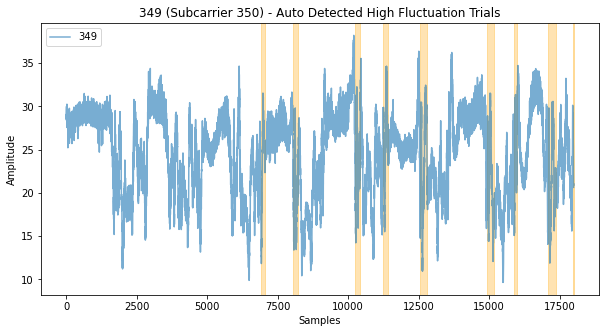

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ====== Step 1: Load your CSV file ======
file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-3.csv"   
df = pd.read_csv(file_path)

# ====== Step 2: Folder to save trials ======
save_path = "D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3/"         
os.makedirs(save_path, exist_ok=True)
print(f" Trials will be saved in: {save_path}")

# ====== Step 3: Find subcarrier with highest variance ======
variances = df.var(axis=0)
top_sub = variances.idxmax()
top_sub_index = list(df.columns).index(top_sub) + 1   

print(f" Total subcarriers in file: {len(df.columns)}")
print(f" Highest variance subcarrier: {top_sub}  (Subcarrier number: {top_sub_index})")

# ====== Step 4: Compute rolling standard deviation ======
signal = df[top_sub].values
window_size = 100  # Adjust depending on signal smoothness
rolling_std = pd.Series(signal).rolling(window=window_size).std()

# ====== Step 5: Detect high-fluctuation regions ======
threshold = rolling_std.mean() + rolling_std.std()
high_var = rolling_std > threshold

segments = []
in_segment = False
start = None

for i, val in enumerate(high_var):
    if val and not in_segment:
        start = i
        in_segment = True
    elif not val and in_segment:
        end = i
        if end - start > window_size:  # ignore tiny spikes
            segments.append((start, end))
        in_segment = False

# Handle case where the signal ends inside a segment
if in_segment:
    segments.append((start, len(signal)))

# ====== Step 6: Save each detected region as a trial ======
print(f"\nDetected {len(segments)} high-variance trials for {top_sub}:")

for idx, (start_idx, end_idx) in enumerate(segments, start=1):
    trial = df.loc[start_idx:end_idx, [top_sub]]
    filename = os.path.join(save_path, f"trial_{top_sub}_{start_idx}_{end_idx}.csv")
    trial.to_csv(filename, index=False)
    print(f" Saved {filename} (range {start_idx}-{end_idx})")

# ====== Step 7: Plot signal with highlighted trial regions ======
plt.figure(figsize=(10, 5))
plt.plot(signal, label=f'{top_sub}', alpha=0.6)
for (start, end) in segments:
    plt.axvspan(start, end, color='orange', alpha=0.3)
plt.title(f"{top_sub} (Subcarrier {top_sub_index}) - Auto Detected High Fluctuation Trials")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [ ]:
s